In [145]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set(context='notebook')

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_wine

In [146]:
wine = load_wine()

x = wine.data
y = wine.target

In [147]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [155]:
df = pd.DataFrame(x, columns = wine.feature_names)
df['type'] = y

In [164]:
df.sample(n = 8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,2
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
26,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195.0,0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0,1


In [ ]:
target_corr = df.corr()['type'].values

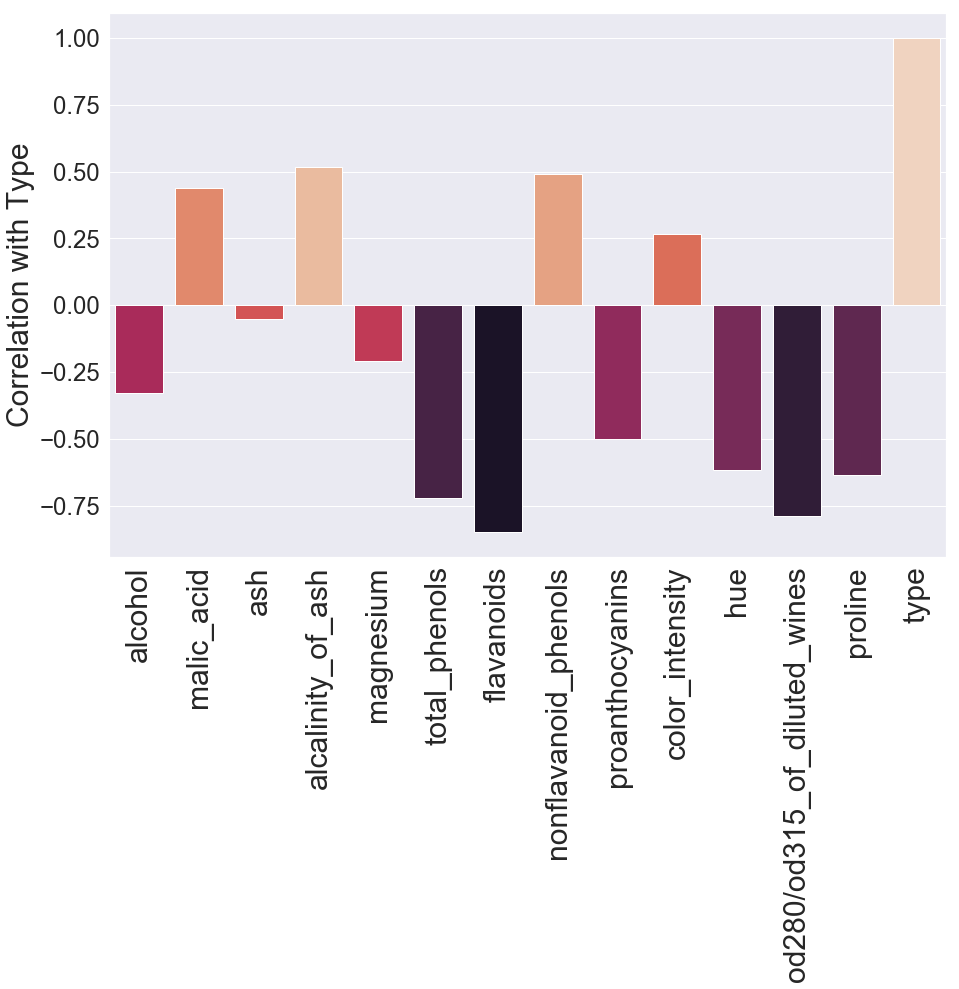

In [220]:
fig = plt.figure(figsize=(15, 10))
ax = sbn.barplot(x = df.columns, 
                 y = target_corr,
                 hue = target_corr,
                 palette="rocket",
                 dodge = False)

plt.ylabel('Correlation with Type', 
           fontsize = 30)

plt.tick_params(labelsize = 24)
ax.set_xticklabels(df.columns.tolist(),
                  fontsize = 30,
                  rotation = 'vertical')

ax.legend_.remove()

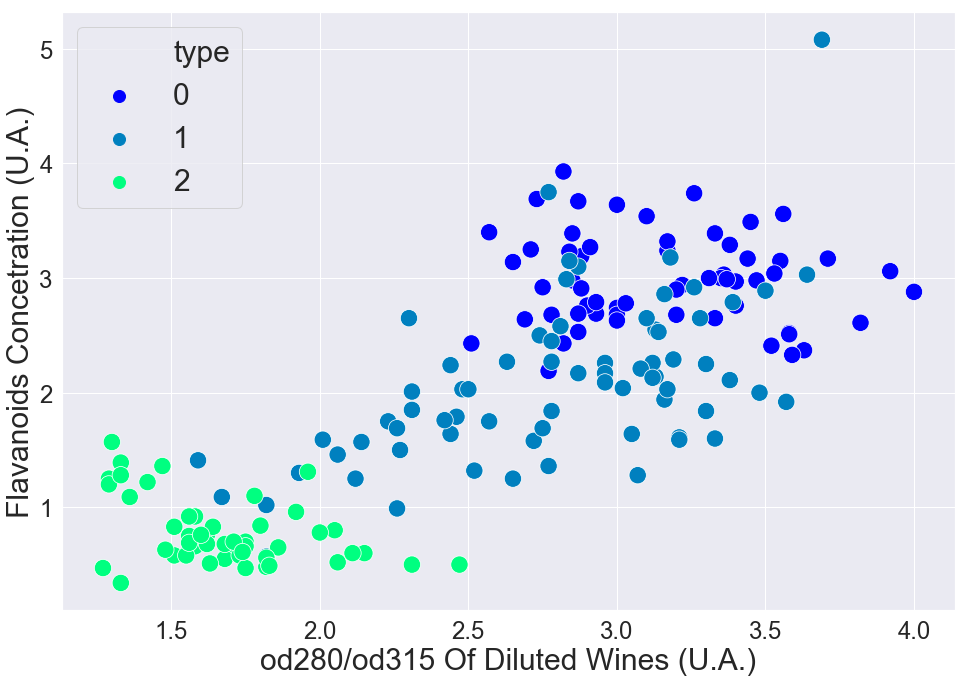

In [238]:
fig = plt.figure(figsize=(16, 11))

ax = sbn.scatterplot(x    = 'od280/od315_of_diluted_wines', 
                     y    = 'flavanoids', 
                     hue  = 'type', 
                     data = df,
                     s    = 300,
                     palette = 'winter'
)

plt.xlabel('od280/od315 Of Diluted Wines (U.A.)', fontsize=30)
plt.ylabel('Flavanoids Concetration (U.A.)', fontsize=30)
plt.tick_params(labelsize = 24)

plt.legend(loc="upper left", 
           markerscale=2., 
           fontsize=30)

plt.show()

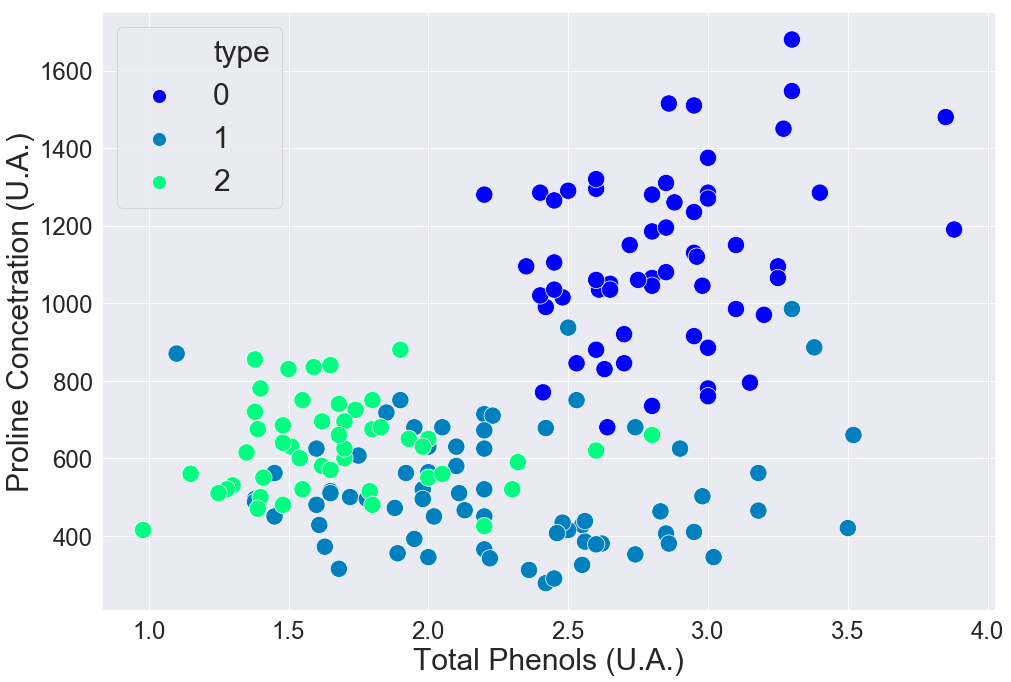

In [243]:
fig = plt.figure(figsize=(16, 11))

ax = sbn.scatterplot(x    = 'total_phenols', 
                     y    = 'proline', 
                     hue  = 'type', 
                     data = df,
                     s    = 300,
                     palette = 'winter'
)

plt.xlabel('Total Phenols (U.A.)', fontsize=30)
plt.ylabel('Proline Concetration (U.A.)', fontsize=30)
plt.tick_params(labelsize = 24)

plt.legend(loc="upper left", 
           markerscale=2., 
           fontsize=30)

plt.show()

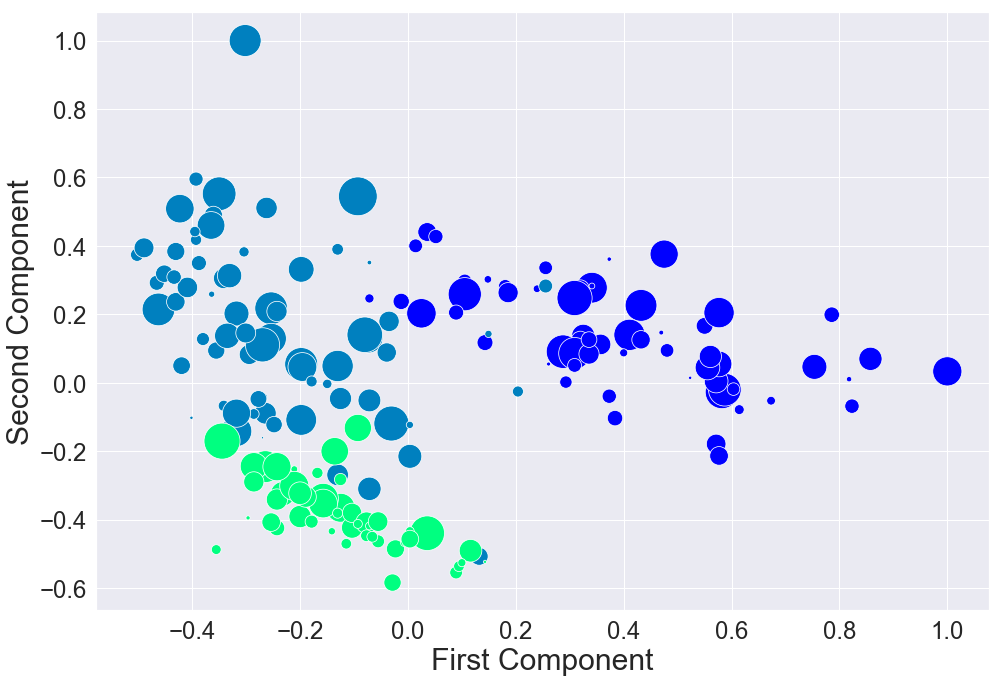

In [400]:
fig = plt.figure(figsize=(16, 11))

size = abs(1500*df_pca['third'].values)

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     hue  = 'class',
                     data = df_pca,
                     s = size,
                     palette = 'winter')

plt.xlabel('First Component', fontsize=30)
plt.ylabel('Second Component', fontsize=30)
plt.tick_params(labelsize = 24)

plt.legend(loc="upper left", 
           markerscale=2., 
           fontsize=30)

ax.legend_.remove()
plt.show()

In [401]:
pca = PCA(n_components=3)

x_pca = pca.fit_transform(x)
x_norm = ms.fit_transform(x_pca)
df_pca = pd.DataFrame(np.c_[x_norm, y],
                       columns = ['first',
                                  'second',
                                  'third',
                                  'class'])\
             .astype({'first'  :float,
                      'second' :float, 
                      'class'  :int})

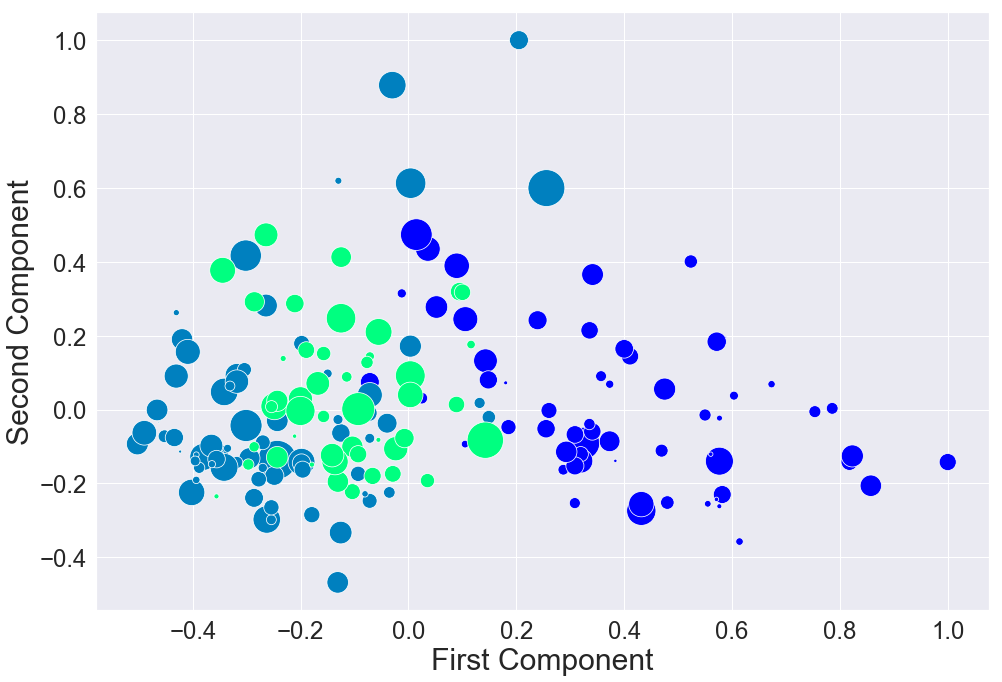

In [402]:
fig = plt.figure(figsize=(16, 11))

size = abs(1500*df_pca['third'].values)

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     hue  = 'class',
                     data = df_pca,
                     s = size,
                     palette = 'winter')

plt.xlabel('First Component', fontsize=30)
plt.ylabel('Second Component', fontsize=30)
plt.tick_params(labelsize = 24)

plt.legend(loc="upper left", 
           markerscale=2., 
           fontsize=30)

ax.legend_.remove()
plt.show()